In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time

In [0]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.mnist.load_data()

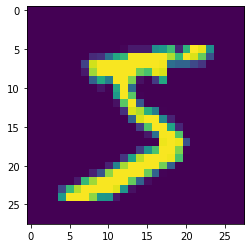

In [3]:
plt.imshow(train_images[0])

In [0]:
train_images=train_images.reshape(train_images.shape[0],28,28,1)

In [0]:
train_images=(train_images-127.5)/127.5

In [0]:
BUFFER_SIZE=train_images.shape[0]
BATCH_SIZE=100
train_dataset=tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# DISCRIMINATOR


In [0]:
def make_discriminator_model():
  model=tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(7,(3,3),padding='same',input_shape=(28,28,1)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.LeakyReLU())
  model.add(tf.keras.layers.Dense(50,activation='relu'))
  model.add(tf.keras.layers.Dense(1))
  return model

In [0]:
discriminator_model=make_discriminator_model()

In [0]:
discriminator_optimizer=tf.optimizers.Adam(1e-3)

In [0]:
def discriminator_loss(real_predictions,fake_predictions):
  real_predictions=tf.sigmoid(real_predictions)
  fake_predictions=tf.sigmoid(fake_predictions)
  real_loss=tf.losses.binary_crossentropy(tf.ones_like(real_predictions),real_predictions)
  fake_loss=tf.losses.binary_crossentropy(tf.zeros_like(fake_predictions),fake_predictions)
  return real_loss+fake_loss

# GENERATOR


In [0]:
def make_generator_model():
  model=tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(7*7*256,input_shape=(100,)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Reshape((7,7,256)))
  model.add(tf.keras.layers.Convolution2DTranspose(128,(3,3),padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Convolution2DTranspose(64,(3,3),strides=(2,2),padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Convolution2DTranspose(1,(3,3),strides=(2,2),padding='same'))
  return model

In [0]:
generator=make_generator_model()

In [0]:
def generator_loss(fake_predictions):
  fake_predictions=tf.sigmoid(fake_predictions)
  fake_loss=tf.losses.binary_crossentropy(tf.ones_like(fake_predictions),fake_predictions)
  return fake_loss

In [0]:
generator_optimizer=tf.optimizers.Adam(1e-4)

# Training

In [0]:
def train(dataset,epochs):
  for i in range(epochs):
    for images in dataset:
      images=tf.cast(images,tf.dtypes.float32)
      train_step(images)


In [0]:
def train_step(images):
  fake_image_noise=np.random.randn(BATCH_SIZE,100).astype('float32')
  with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
    generated_images=generator(fake_image_noise)
    
    real_output=discriminator_model(images)
    fake_output=discriminator_model(generated_images)
    
    gen_loss=generator_loss(fake_output)
    disc_loss=discriminator_loss(real_output,fake_output)
    
    gradients_of_generator=gen_tape.gradient(gen_loss,generator.trainable_variables)
    gradients_of_discriminator=disc_tape.gradient(disc_loss,discriminator_model.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator,generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator,discriminator_model.trainable_variables))
    
    print('generator loss : ',np.mean(gen_loss))
    print('discriminator loss :',np.mean(disc_loss))


In [17]:
train(train_dataset,5)

Streaming output truncated to the last 5000 lines.
discriminator loss : 0.11162034
generator loss :  13.84267
discriminator loss : 0.22178091
generator loss :  14.590951
discriminator loss : 0.1843163
generator loss :  13.870038
discriminator loss : 0.0550066
generator loss :  13.931025
discriminator loss : 0.031648245
generator loss :  12.774898
discriminator loss : 0.07549504
generator loss :  11.885594
discriminator loss : 0.15532877
generator loss :  12.836726
discriminator loss : 0.10428098
generator loss :  12.539092
discriminator loss : 0.22172688
generator loss :  12.489882
discriminator loss : 0.0646382
generator loss :  13.133439
discriminator loss : 0.10740821
generator loss :  13.608489
discriminator loss : 0.13574901
generator loss :  13.953416
discriminator loss : 0.081059664
generator loss :  14.110539
discriminator loss : 0.15545426
generator loss :  12.270194
discriminator loss : 0.4548362
generator loss :  14.422297
discriminator loss : 0.07156352
generator loss :  13

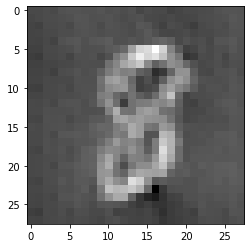

In [21]:
plt.imshow(tf.reshape(generator(np.random.randn(1,100)),(28,28)),cmap='gray')